In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from imblearn.over_sampling import RandomOverSampler

The dataset used in this project is from the github https://github.com/chandanamulagund/Maximizing-Performance-Data-Analysis-of-Formula-1-Driver-and-Race-Data/blob/main/F1DriversDataset%202.csv

It contains driver data from F1 in 1950 to 2024. And contains Driver name, nationality, seasons, championships, race entries, race starts,race wins, podiums, fastest laps and the rates of those columns


In [48]:
df = pd.read_csv('/content/F1DriversDataset 2.csv')
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [49]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [50]:
df.isnull().sum()

,0
Driver,0
Nationality,0
Seasons,0
Championships,0
Race_Entries,0
Race_Starts,0
Pole_Positions,0
Race_Wins,0
Podiums,0
Fastest_Laps,0


In [51]:
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


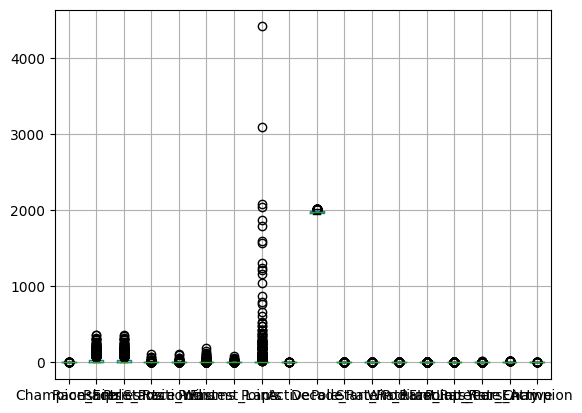

In [52]:
df.boxplot()
plt.show()

In [53]:
updated_df = df.drop(columns=['Driver', 'Championship Years', 'Nationality', 'Seasons', 'Active', 'Decade'])
updated_df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,0.0,23.0,23.0,0.0,0.0,0.0,2.0,6.0,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,0.0,37.0,36.0,0.0,0.0,0.0,0.0,3.0,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,0.0,7.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [54]:
le = LabelEncoder()
updated_df['Champion'] = le.fit_transform(updated_df['Champion'])
updated_df

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,0
1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,0
2,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,0
3,0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,0
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,0
864,0.0,23.0,23.0,0.0,0.0,0.0,2.0,6.0,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,0
865,0.0,37.0,36.0,0.0,0.0,0.0,0.0,3.0,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,0
866,0.0,7.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,0


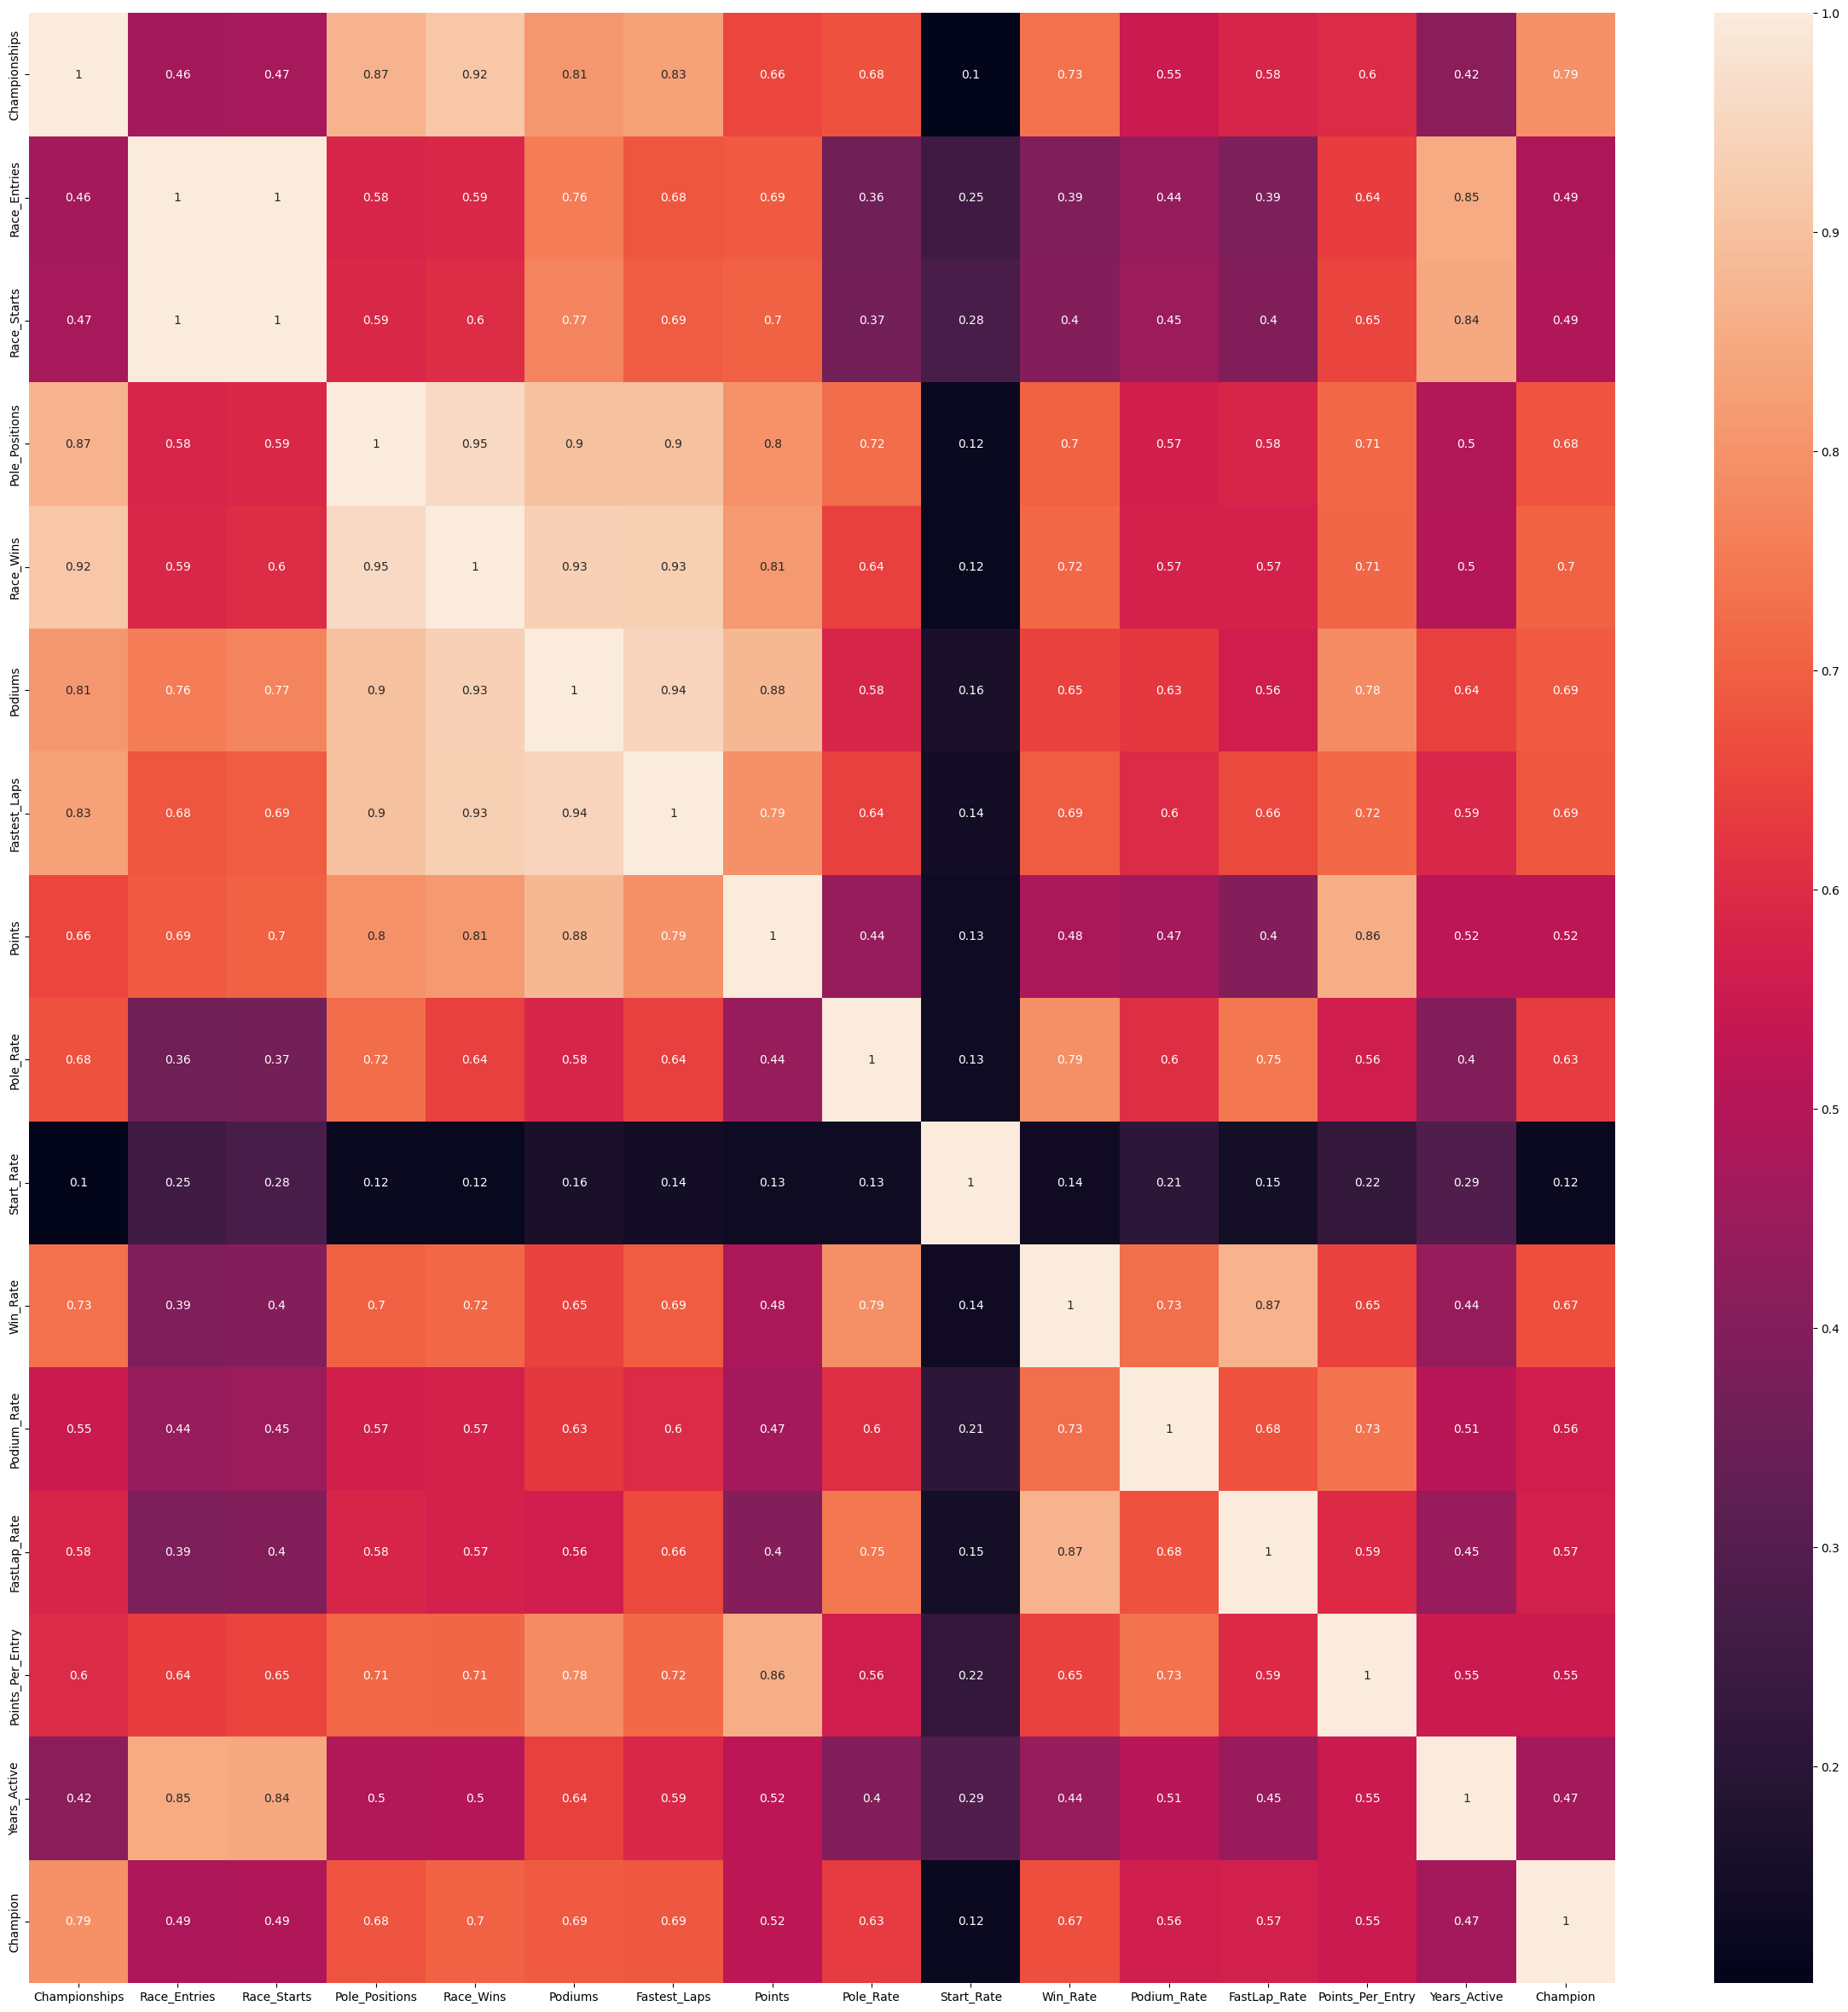

                  Championships  Race_Entries  Race_Starts  Pole_Positions  \
Championships          1.000000      0.462985     0.471073        0.869342   
Race_Entries           0.462985      1.000000     0.996701        0.582264   
Race_Starts            0.471073      0.996701     1.000000        0.591793   
Pole_Positions         0.869342      0.582264     0.591793        1.000000   
Race_Wins              0.915247      0.590658     0.600889        0.954951   
Podiums                0.808274      0.757007     0.768449        0.901514   
Fastest_Laps           0.829641      0.681107     0.691432        0.899697   
Points                 0.655567      0.689361     0.701817        0.799746   
Pole_Rate              0.675121      0.360392     0.367880        0.724572   
Start_Rate             0.101046      0.250540     0.275386        0.122427   
Win_Rate               0.730320      0.391760     0.400482        0.702441   
Podium_Rate            0.549377      0.440430     0.451132      

In [68]:
plt.figure(figsize=(30, 30))
sns.heatmap(updated_df.corr(), annot=True)

plt.show()
print(updated_df.corr())

In [69]:
y = updated_df['Champion']
x = updated_df[['Race_Wins', 'Pole_Positions', 'Podiums', 'Pole_Rate', 'Win_Rate', 'Fastest_Laps', 'Podium_Rate', 'FastLap_Rate']]
print(x)
print(y)

     Race_Wins  Pole_Positions  Podiums  Pole_Rate  Win_Rate  Fastest_Laps  \
0          0.0             0.0      0.0        0.0       0.0           0.0   
1          0.0             0.0      0.0        0.0       0.0           0.0   
2          0.0             0.0      0.0        0.0       0.0           0.0   
3          0.0             0.0      0.0        0.0       0.0           0.0   
4          0.0             0.0      0.0        0.0       0.0           0.0   
..         ...             ...      ...        ...       ...           ...   
863        0.0             0.0      0.0        0.0       0.0           0.0   
864        0.0             0.0      0.0        0.0       0.0           2.0   
865        0.0             0.0      0.0        0.0       0.0           0.0   
866        0.0             0.0      0.0        0.0       0.0           0.0   
867        0.0             0.0      0.0        0.0       0.0           0.0   

     Podium_Rate  FastLap_Rate  
0            0.0      0.000000

In [70]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [71]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,554 (45.13 KB)

 Trainable params: 11,554 (45.13 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9808 - loss: 0.0361 - val_accuracy: 0.9770 - val_loss: 0.0346
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9849 - loss: 0.0345 - val_accuracy: 0.9885 - val_loss: 0.0348
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9835 - loss: 0.0285 - val_accuracy: 0.9885 - val_loss: 0.0328
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9795 - loss: 0.0426 - val_accuracy: 0.9770 - val_loss: 0.0242
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.9770 - val_loss: 0.0244
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9789 - loss: 0.0356 - val_accuracy: 0.9885 - val_loss: 0.0260
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9817 - loss: 0.0319 - val_accuracy: 0.9885 - val_loss: 0.0294
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9862 - loss: 0.0570 - val_accuracy: 0.9770 - val_los

In [78]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04041628912091255
Test accuracy: 0.977011501789093


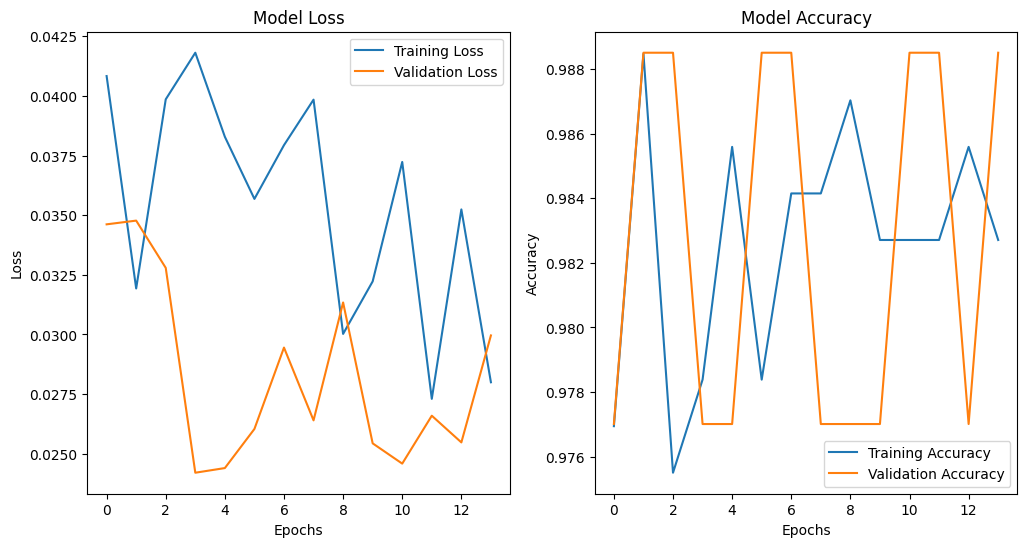

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Loss')


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()